In [1]:
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from pprint import pprint
from random import randint, gauss
import numpy as np
#import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))
set1 = cm.get_cmap(plt.get_cmap('Set1'))
tab20 = cm.get_cmap(plt.get_cmap('tab20'))

def tableau20(color):
    # Use coordinated colors. These are the "Tableau 20" colors as
    # RGB. Each pair is strong/light. For a theory of color
    tableau20 = [(31 , 119, 180), (174, 199, 232), # blue        [ 0,1 ]
                 (255, 127, 14 ), (255, 187, 120), # orange      [ 2,3 ]
                 (44 , 160, 44 ), (152, 223, 138), # green       [ 4,5 ]
                 (214, 39 , 40 ), (255, 152, 150), # red         [ 6,7 ]
                 (148, 103, 189), (197, 176, 213), # purple      [ 8,9 ]
                 (140, 86 , 75 ), (196, 156, 148), # brown       [10,11]
                 (227, 119, 194), (247, 182, 210), # pink        [12,13]
                 (188, 189, 34 ), (219, 219, 141), # yellow      [14,15]
                 (23 , 190, 207), (158, 218, 229), # cyan        [16,17]
                 (65 , 68 , 81 ), (96 , 99 , 106), # gray        [18,19]
                 (127, 127, 127), (143, 135, 130), # gray        [20,21]
                 (165, 172, 175), (199, 199, 199), # gray        [22,23]
                 (207, 207, 207)]                   # gray        [24]
    # Scale the RGB values to the [0, 1] range, which is the format
    # matplotlib accepts.
    r, g, b = tableau20[color]
    return (round(r/255.,1), round(g/255.,1), round(b/255.,1))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [2]:
StHomoCampaigns_4DynHomoResourcesHEFT = pd.read_csv('../Data/heft/StHomoCampaigns_4DynHomoResourcesHEFT_new.csv')
StHomoCampaigns_4DynHomoResourcesL2FF = pd.read_csv('../Data/l2ff/StHomoCampaigns_4DynHomoResourcesL2FF_new.csv')
StHomoCampaigns_4DynHomoResourcesGA00 = pd.read_csv('../Data/ga/perc_100/StHomoCampaigns_4DynHomoResourcesGA00_new.csv')
StHomoCampaigns_4DynHomoResourcesGA25 = pd.read_csv('../Data/ga/perc_075/StHomoCampaigns_4DynHomoResourcesGA25_new.csv')
StHomoCampaigns_4DynHomoResourcesGA50 = pd.read_csv('../Data/ga/perc_050/StHomoCampaigns_4DynHomoResourcesGA50_new.csv')
StHomoCampaigns_4DynHomoResourcesRAND = pd.read_csv('../Data/random/StHomoCampaigns_4DynHomoResourcesRAND_new.csv')

StHomoCampaigns_4DynHomoResourcesHEFT['mpn_snt_norm'] = StHomoCampaigns_4DynHomoResourcesHEFT['mpn_snt'] / StHomoCampaigns_4DynHomoResourcesHEFT['expected']
StHomoCampaigns_4DynHomoResourcesL2FF['mpn_snt_norm'] = StHomoCampaigns_4DynHomoResourcesL2FF['mpn_snt'] / StHomoCampaigns_4DynHomoResourcesL2FF['expected']
StHomoCampaigns_4DynHomoResourcesGA50['mpn_snt_norm'] = StHomoCampaigns_4DynHomoResourcesGA50['mpn_snt'] / StHomoCampaigns_4DynHomoResourcesGA50['expected']
StHomoCampaigns_4DynHomoResourcesRAND['mpn_snt_norm'] = StHomoCampaigns_4DynHomoResourcesRAND['mpn_snt'] / StHomoCampaigns_4DynHomoResourcesRAND['expected']

StHomoCampaigns_4DynHomoResourcesHEFT = StHomoCampaigns_4DynHomoResourcesHEFT.groupby(by=['size'])
StHomoCampaigns_4DynHomoResourcesHEFT_means = StHomoCampaigns_4DynHomoResourcesHEFT.mean()
StHomoCampaigns_4DynHomoResourcesHEFT_stds = StHomoCampaigns_4DynHomoResourcesHEFT.std()
StHomoCampaigns_4DynHomoResourcesL2FF = StHomoCampaigns_4DynHomoResourcesL2FF.groupby(by=['size'])
StHomoCampaigns_4DynHomoResourcesL2FF_means = StHomoCampaigns_4DynHomoResourcesL2FF.mean()
StHomoCampaigns_4DynHomoResourcesL2FF_stds = StHomoCampaigns_4DynHomoResourcesL2FF.std()
StHomoCampaigns_4DynHomoResourcesGA00 = StHomoCampaigns_4DynHomoResourcesGA00.groupby(by=['size'])
StHomoCampaigns_4DynHomoResourcesGA00_means = StHomoCampaigns_4DynHomoResourcesGA00.mean()
StHomoCampaigns_4DynHomoResourcesGA00_stds = StHomoCampaigns_4DynHomoResourcesGA00.std()
StHomoCampaigns_4DynHomoResourcesGA25 = StHomoCampaigns_4DynHomoResourcesGA25.groupby(by=['size'])
StHomoCampaigns_4DynHomoResourcesGA25_means = StHomoCampaigns_4DynHomoResourcesGA25.mean()
StHomoCampaigns_4DynHomoResourcesGA25_stds = StHomoCampaigns_4DynHomoResourcesGA25.std()
StHomoCampaigns_4DynHomoResourcesGA50 = StHomoCampaigns_4DynHomoResourcesGA50.groupby(by=['size'])
StHomoCampaigns_4DynHomoResourcesGA50_means = StHomoCampaigns_4DynHomoResourcesGA50.mean()
StHomoCampaigns_4DynHomoResourcesGA50_stds = StHomoCampaigns_4DynHomoResourcesGA50.std()
StHomoCampaigns_4DynHomoResourcesRAND = StHomoCampaigns_4DynHomoResourcesRAND.groupby(by=['size'])
StHomoCampaigns_4DynHomoResourcesRAND_means = StHomoCampaigns_4DynHomoResourcesRAND.mean()
StHomoCampaigns_4DynHomoResourcesRAND_stds = StHomoCampaigns_4DynHomoResourcesRAND.std()

In [3]:
StHomoCampaigns_4DynHomoResourcesHEFT_means

,makespan,reactive,expected,mpn_snt,rect_snt,time,mpn_snt_norm
size,,,,,,,
4,8.045405e+04,8.040623e+04,75000.0,5454.046018,5406.230539,0.000036,0.072721
8,1.590446e+05,1.583316e+05,150000.0,9044.560739,8331.625677,0.000059,0.060297
16,3.134087e+05,3.115997e+05,300000.0,13408.719355,11599.722208,0.000077,0.044696
32,6.212355e+05,6.191477e+05,600000.0,21235.543449,19147.702300,0.000115,0.035393
64,1.233179e+06,1.227614e+06,1200000.0,33179.173586,27614.464871,0.000223,0.027649
128,2.447703e+06,2.441517e+06,2400000.0,47702.570764,41516.811627,0.000372,0.019876
256,4.872505e+06,4.862631e+06,4800000.0,72505.476021,62630.780853,0.000676,0.015105
512,9.720143e+06,9.707880e+06,9600000.0,120143.310122,107880.285926,0.001409,0.012515
1024,1.938871e+07,1.936837e+07,19200000.0,188706.375039,168368.351440,0.002801,0.009828


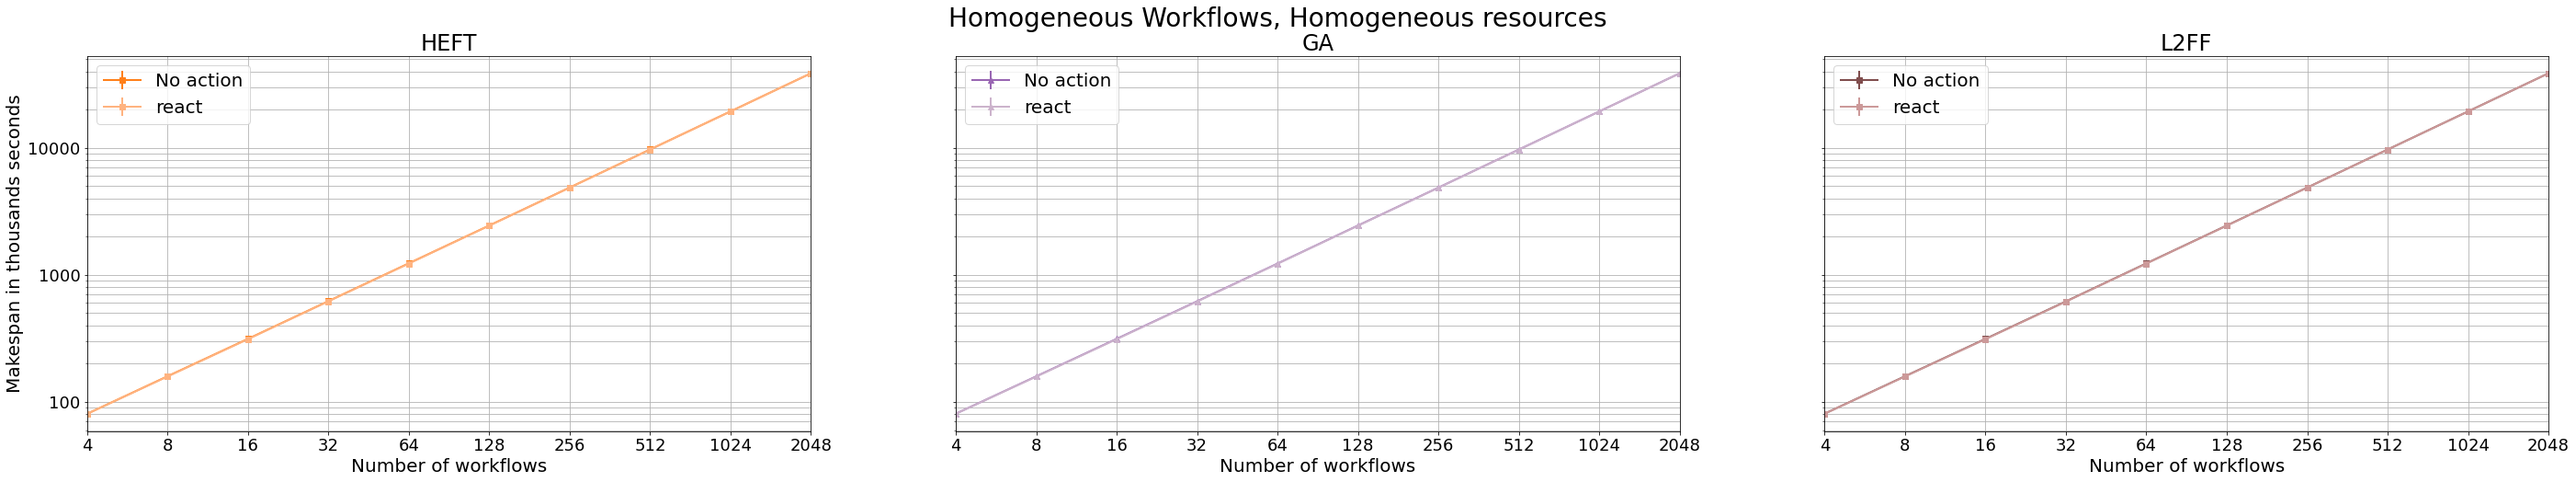

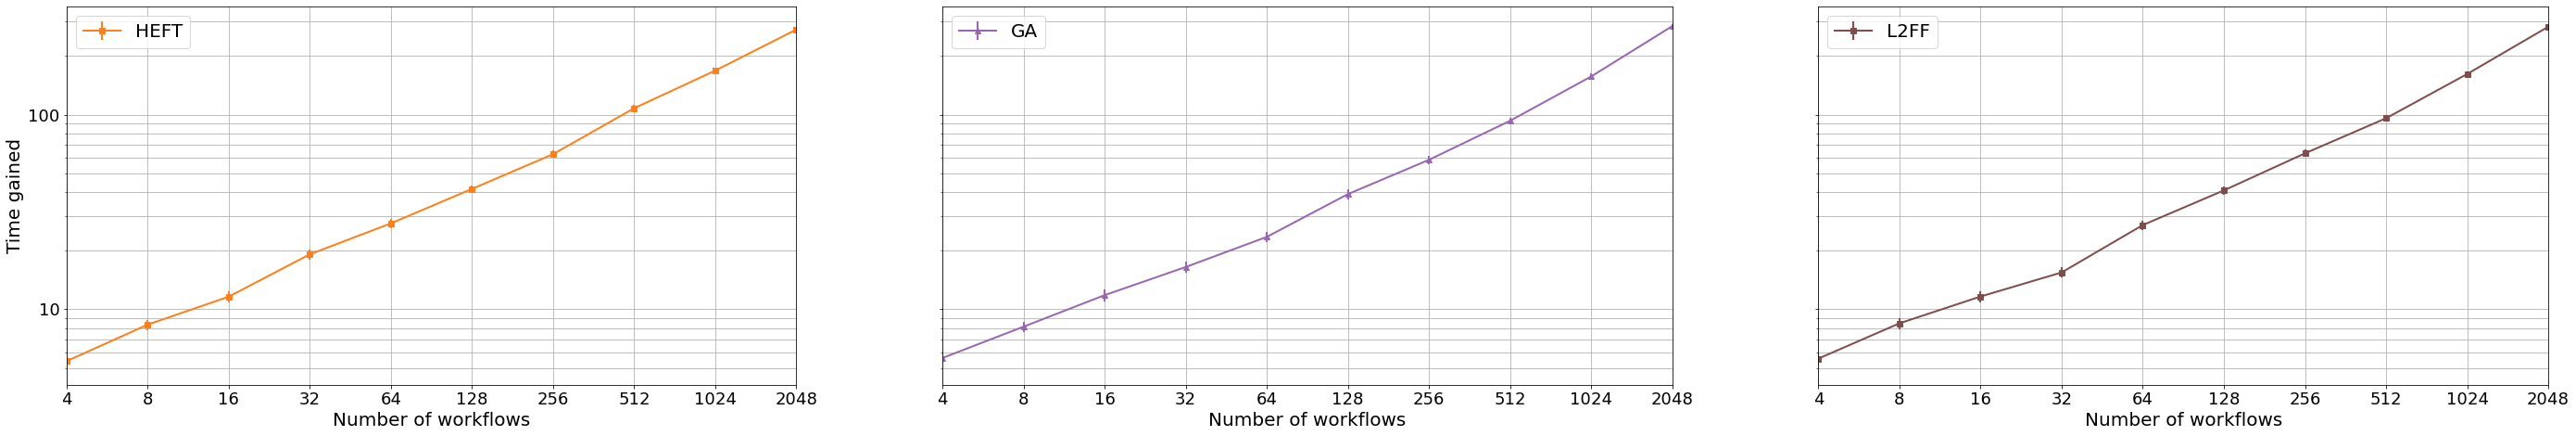

In [8]:
fig,axis = plt.subplots(nrows=1,ncols=3,figsize=(48,7.5), sharex=True, sharey=True)
_ = axis[0].errorbar(StHomoCampaigns_4DynHomoResourcesHEFT_means.index, StHomoCampaigns_4DynHomoResourcesHEFT_means['makespan'].values, StHomoCampaigns_4DynHomoResourcesHEFT_stds['makespan'].values / 10, marker='s',label='No action', color=tableau20(2),linewidth=2)
_ = axis[1].errorbar(StHomoCampaigns_4DynHomoResourcesGA50_means.index, StHomoCampaigns_4DynHomoResourcesGA50_means['makespan'].values, StHomoCampaigns_4DynHomoResourcesGA50_stds['makespan'].values / 10, color=tableau20(8),marker='^',label='No action',linewidth=2)
_ = axis[2].errorbar(StHomoCampaigns_4DynHomoResourcesL2FF_means.index, StHomoCampaigns_4DynHomoResourcesL2FF_means['makespan'].values, StHomoCampaigns_4DynHomoResourcesL2FF_stds['makespan'].values / 10, marker='s',label='No action', color=tableau20(10),linewidth=2)


_ = axis[0].errorbar(StHomoCampaigns_4DynHomoResourcesHEFT_means.index, StHomoCampaigns_4DynHomoResourcesHEFT_means['reactive'].values, StHomoCampaigns_4DynHomoResourcesHEFT_stds['reactive'].values / 10, marker='s',label='react', color=tableau20(3),linewidth=2)
_ = axis[1].errorbar(StHomoCampaigns_4DynHomoResourcesGA50_means.index, StHomoCampaigns_4DynHomoResourcesGA50_means['reactive'].values, StHomoCampaigns_4DynHomoResourcesGA50_stds['reactive'].values / 10, color=tableau20(9),marker='^',label='react',linewidth=2)
_ = axis[2].errorbar(StHomoCampaigns_4DynHomoResourcesL2FF_means.index, StHomoCampaigns_4DynHomoResourcesL2FF_means['reactive'].values, StHomoCampaigns_4DynHomoResourcesL2FF_stds['reactive'].values / 10, marker='s',label='react', color=tableau20(11),linewidth=2)

# _ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis[0].set_xlim([4, 2048])
_ = axis[0].set_yscale('log')
_ = axis[0].set_xscale('symlog',basex=2)
_ = axis[0].set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis[0].set_xlabel('Number of workflows',fontsize=20)
_ = axis[1].set_xlabel('Number of workflows',fontsize=20)
_ = axis[2].set_xlabel('Number of workflows',fontsize=20)
_ = axis[0].set_title('HEFT',fontsize=24)
_ = axis[1].set_title('GA',fontsize=24)
_ = axis[2].set_title('L2FF',fontsize=24)
fig.suptitle('Homogeneous Workflows, Homogeneous resources', fontsize=28)
_ = axis[0].set_xticks(StHomoCampaigns_4DynHomoResourcesHEFT_means.index)
_ = axis[0].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[0].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[0].grid('on', which='both')

_ = axis[1].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[1].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[1].grid('on', which='both')

_ = axis[2].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[2].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[2].grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis[0].legend(fontsize=20)
_ = axis[1].legend(fontsize=20)
_ = axis[2].legend(fontsize=20)
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

fig,axis = plt.subplots(nrows=1,ncols=3,figsize=(48,7.5), sharex=True, sharey=True)
_ = axis[0].errorbar(StHomoCampaigns_4DynHomoResourcesHEFT_means.index, StHomoCampaigns_4DynHomoResourcesHEFT_means['rect_snt'].values, StHomoCampaigns_4DynHomoResourcesHEFT_stds['rect_snt'].values / 10, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
_ = axis[1].errorbar(StHomoCampaigns_4DynHomoResourcesGA50_means.index, StHomoCampaigns_4DynHomoResourcesGA50_means['rect_snt'].values, StHomoCampaigns_4DynHomoResourcesGA50_stds['rect_snt'].values / 10, color=tableau20(8),marker='^',label='GA',linewidth=2)
_ = axis[2].errorbar(StHomoCampaigns_4DynHomoResourcesL2FF_means.index, StHomoCampaigns_4DynHomoResourcesL2FF_means['rect_snt'].values, StHomoCampaigns_4DynHomoResourcesL2FF_stds['rect_snt'].values / 10, marker='s',label='L2FF', color=tableau20(10),linewidth=2)
# _ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis[0].set_xlim([4, 2048])
_ = axis[0].set_yscale('log')
_ = axis[0].set_xscale('symlog',basex=2)
_ = axis[0].set_ylabel('Time gained',fontsize=20)
_ = axis[0].set_xlabel('Number of workflows',fontsize=20)
_ = axis[1].set_xlabel('Number of workflows',fontsize=20)
_ = axis[2].set_xlabel('Number of workflows',fontsize=20)
_ = axis[0].set_xticks(StHomoCampaigns_4DynHomoResourcesHEFT_means.index)
_ = axis[0].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[0].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[0].grid('on', which='both')

_ = axis[1].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[1].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[1].grid('on', which='both')

_ = axis[2].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[2].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[2].grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis[0].legend(fontsize=20)
_ = axis[1].legend(fontsize=20)
_ = axis[2].legend(fontsize=20)
#_ = fig.savefig('../Figures/Experiment2/StHomoCampaigns_4DynHomoResourcesSens.pdf',bbox_inches='tight')
#_ = fig.savefig('../Figures/Experiment2/StHomoCampaigns_4DynHomoResourcesSens.png',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

In [5]:
StHeteroCampaigns_4DynHeteroResourcesHEFT = pd.read_csv('../Data/heft/StHeteroCampaigns_4DynHeteroResourcesHEFT_new.csv')
StHeteroCampaigns_4DynHeteroResourcesL2FF = pd.read_csv('../Data/l2ff/StHeteroCampaigns_4DynHeteroResourcesL2FF_new.csv')
StHeteroCampaigns_4DynHeteroResourcesGA50 = pd.read_csv('../Data/ga/perc_050/StHeteroCampaigns_4DynHeteroResourcesGA50_new.csv')
StHeteroCampaigns_4DynHeteroResourcesRAND = pd.read_csv('../Data/random/StHeteroCampaigns_4DynHeteroResourcesRAND_new.csv')

StHeteroCampaigns_4DynHeteroResourcesHEFT['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesHEFT['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesHEFT['expected']
StHeteroCampaigns_4DynHeteroResourcesL2FF['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesL2FF['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesL2FF['expected']
StHeteroCampaigns_4DynHeteroResourcesGA50['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesGA50['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesGA50['expected']
StHeteroCampaigns_4DynHeteroResourcesRAND['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesRAND['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesRAND['expected']

StHeteroCampaigns_4DynHeteroResourcesHEFT = StHeteroCampaigns_4DynHeteroResourcesHEFT.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesHEFT_means = StHeteroCampaigns_4DynHeteroResourcesHEFT.mean()
StHeteroCampaigns_4DynHeteroResourcesHEFT_stds = StHeteroCampaigns_4DynHeteroResourcesHEFT.std()
StHeteroCampaigns_4DynHeteroResourcesL2FF = StHeteroCampaigns_4DynHeteroResourcesL2FF.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesL2FF_means = StHeteroCampaigns_4DynHeteroResourcesL2FF.mean()
StHeteroCampaigns_4DynHeteroResourcesL2FF_stds = StHeteroCampaigns_4DynHeteroResourcesL2FF.std()
StHeteroCampaigns_4DynHeteroResourcesGA50 = StHeteroCampaigns_4DynHeteroResourcesGA50.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesGA50_means = StHeteroCampaigns_4DynHeteroResourcesGA50.mean()
StHeteroCampaigns_4DynHeteroResourcesGA50_stds = StHeteroCampaigns_4DynHeteroResourcesGA50.std()
StHeteroCampaigns_4DynHeteroResourcesRAND = StHeteroCampaigns_4DynHeteroResourcesRAND.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesRAND_means = StHeteroCampaigns_4DynHeteroResourcesRAND.mean()
StHeteroCampaigns_4DynHeteroResourcesRAND_stds = StHeteroCampaigns_4DynHeteroResourcesRAND.std()


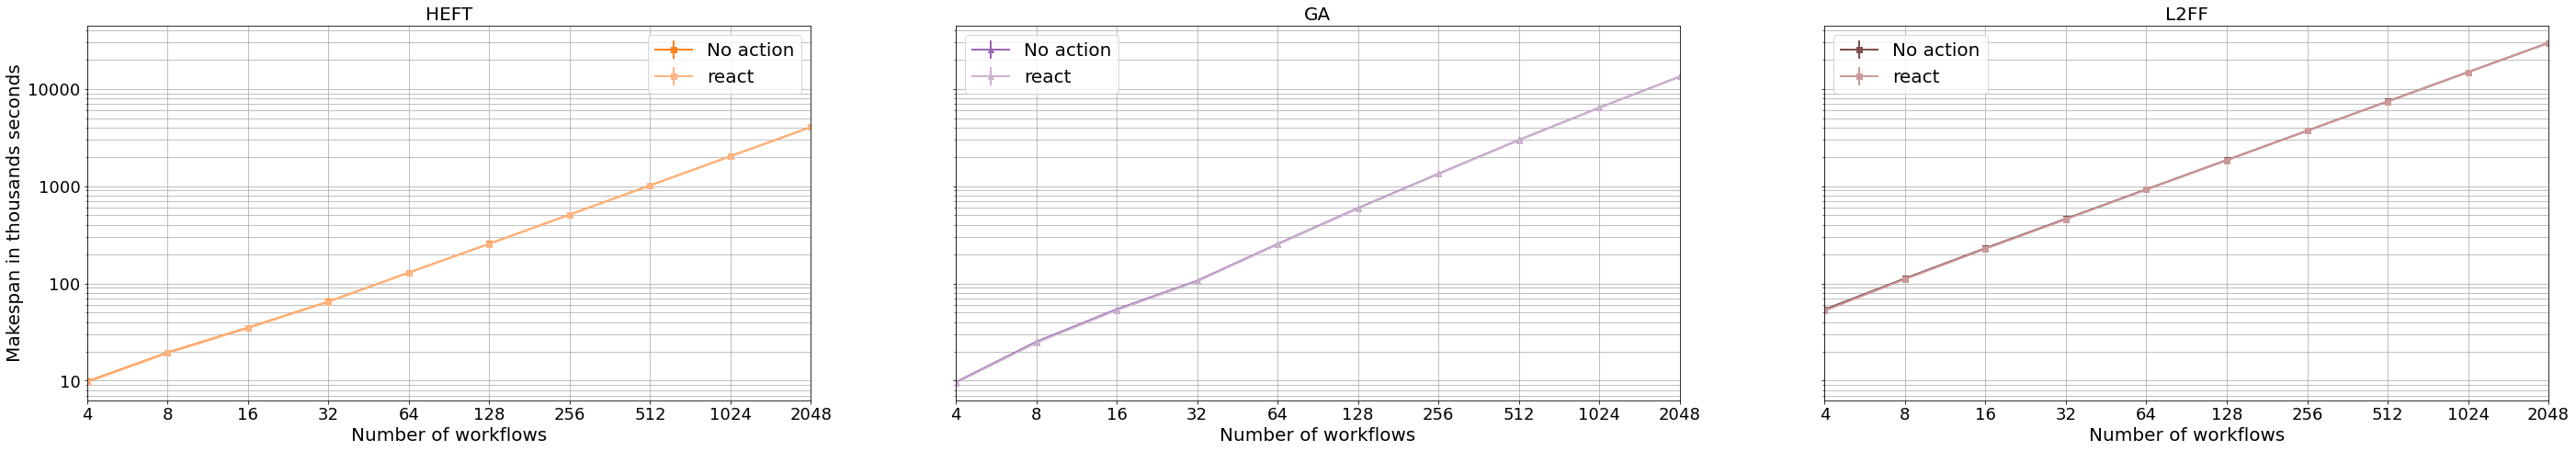

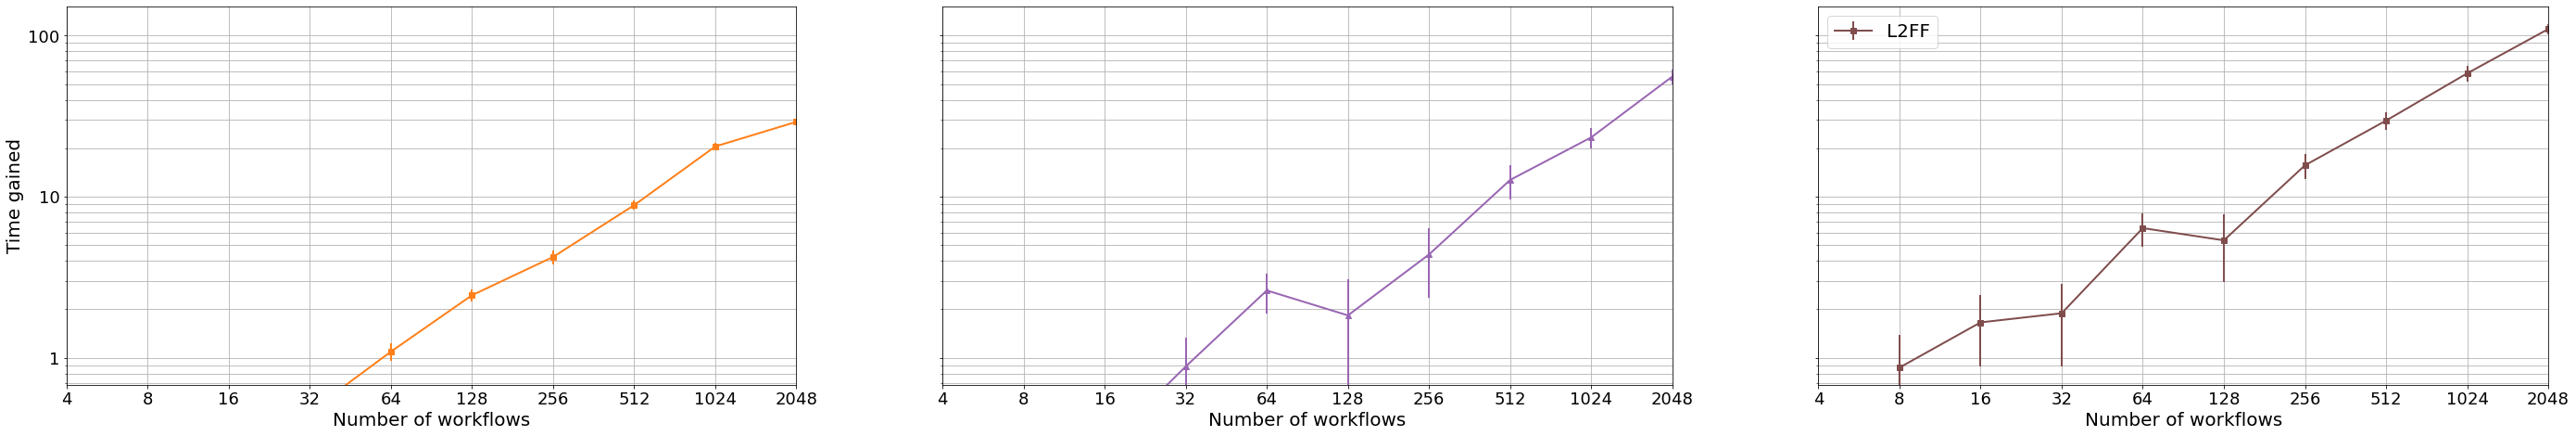

In [6]:
fig,axis = plt.subplots(nrows=1,ncols=3,figsize=(48,7.5), sharex=True, sharey=True)
_ = axis[0].errorbar(StHeteroCampaigns_4DynHeteroResourcesHEFT_means.index, StHeteroCampaigns_4DynHeteroResourcesHEFT_means['makespan'].values, StHeteroCampaigns_4DynHeteroResourcesHEFT_stds['makespan'].values / 10, marker='s',label='No action', color=tableau20(2),linewidth=2)
_ = axis[1].errorbar(StHeteroCampaigns_4DynHeteroResourcesGA50_means.index, StHeteroCampaigns_4DynHeteroResourcesGA50_means['makespan'].values, StHeteroCampaigns_4DynHeteroResourcesGA50_stds['makespan'].values / 10, color=tableau20(8),marker='^',label='No action',linewidth=2)
_ = axis[2].errorbar(StHeteroCampaigns_4DynHeteroResourcesL2FF_means.index, StHeteroCampaigns_4DynHeteroResourcesL2FF_means['makespan'].values, StHeteroCampaigns_4DynHeteroResourcesL2FF_stds['makespan'].values / 10, marker='s',label='No action', color=tableau20(10),linewidth=2)


_ = axis[0].errorbar(StHeteroCampaigns_4DynHeteroResourcesHEFT_means.index, StHeteroCampaigns_4DynHeteroResourcesHEFT_means['reactive'].values, StHeteroCampaigns_4DynHeteroResourcesHEFT_stds['reactive'].values / 10, marker='s',label='react', color=tableau20(3),linewidth=2)
_ = axis[1].errorbar(StHeteroCampaigns_4DynHeteroResourcesGA50_means.index, StHeteroCampaigns_4DynHeteroResourcesGA50_means['reactive'].values, StHeteroCampaigns_4DynHeteroResourcesGA50_stds['reactive'].values / 10, color=tableau20(9),marker='^',label='react',linewidth=2)
_ = axis[2].errorbar(StHeteroCampaigns_4DynHeteroResourcesL2FF_means.index, StHeteroCampaigns_4DynHeteroResourcesL2FF_means['reactive'].values, StHeteroCampaigns_4DynHeteroResourcesL2FF_stds['reactive'].values / 10, marker='s',label='react', color=tableau20(11),linewidth=2)

# _ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis[0].set_xlim([4, 2048])
_ = axis[0].set_yscale('log')
_ = axis[0].set_xscale('symlog',basex=2)
_ = axis[0].set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis[0].set_xlabel('Number of workflows',fontsize=20)
_ = axis[1].set_xlabel('Number of workflows',fontsize=20)
_ = axis[2].set_xlabel('Number of workflows',fontsize=20)
_ = axis[0].set_title('HEFT',fontsize=24)
_ = axis[1].set_title('GA',fontsize=24)
_ = axis[2].set_title('L2FF',fontsize=24)
fig.suptitle('Homogeneous Workflows, Homogeneous resources', fontsize=28)
_ = axis[0].set_xticks(StHomoCampaigns_4DynHomoResourcesHEFT_means.index)
_ = axis[0].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[0].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[0].grid('on', which='both')

_ = axis[1].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[1].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[1].grid('on', which='both')

_ = axis[2].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[2].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[2].grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis[0].legend(fontsize=20)
_ = axis[1].legend(fontsize=20)
_ = axis[2].legend(fontsize=20)
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

fig,axis = plt.subplots(nrows=1,ncols=3,figsize=(48,7.5), sharex=True, sharey=True)
_ = axis[0].errorbar(StHeteroCampaigns_4DynHeteroResourcesHEFT_means.index, StHeteroCampaigns_4DynHeteroResourcesHEFT_means['rect_snt'].values, StHeteroCampaigns_4DynHeteroResourcesHEFT_stds['rect_snt'].values / 10, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
_ = axis[1].errorbar(StHeteroCampaigns_4DynHeteroResourcesGA50_means.index, StHeteroCampaigns_4DynHeteroResourcesGA50_means['rect_snt'].values, StHeteroCampaigns_4DynHeteroResourcesGA50_stds['rect_snt'].values / 10, color=tableau20(8),marker='^',label='GA',linewidth=2)
_ = axis[2].errorbar(StHeteroCampaigns_4DynHeteroResourcesL2FF_means.index, StHeteroCampaigns_4DynHeteroResourcesL2FF_means['rect_snt'].values, StHeteroCampaigns_4DynHeteroResourcesL2FF_stds['rect_snt'].values / 10, marker='s',label='L2FF', color=tableau20(10),linewidth=2)
# _ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis[0].set_xlim([4, 2048])
_ = axis[0].set_yscale('log')
_ = axis[0].set_xscale('symlog',basex=2)
_ = axis[0].set_ylabel('Time gained',fontsize=20)
_ = axis[0].set_xlabel('Number of workflows',fontsize=20)
_ = axis[1].set_xlabel('Number of workflows',fontsize=20)
_ = axis[2].set_xlabel('Number of workflows',fontsize=20)
_ = axis[0].set_xticks(StHomoCampaigns_4DynHomoResourcesHEFT_means.index)
_ = axis[0].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[0].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[0].grid('on', which='both')

_ = axis[1].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[1].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[1].grid('on', which='both')

_ = axis[2].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[2].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[2].grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
#_ = axis[0].legend(fontsize=20)
#_ = axis[1].legend(fontsize=20)
_ = axis[2].legend(fontsize=20)
#_ = fig.savefig('../Figures/Experiment2/StHomoCampaigns_4DynHomoResourcesSens.pdf',bbox_inches='tight')
#_ = fig.savefig('../Figures/Experiment2/StHomoCampaigns_4DynHomoResourcesSens.png',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')